In [1]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


content:
1.Loading and Checking data
2.Data preprocessing
3.Creating Models
    
    Linear Regression
    polynomial Regression
    SVR(Support Vector Regression)
    Decision Tree
    Random Forest
 4.Conclusion
 

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#  loading and checking data


In [3]:
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


There is an id column in data preprocessing,i will drop it because the id column does not positively effect the model


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no null data

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


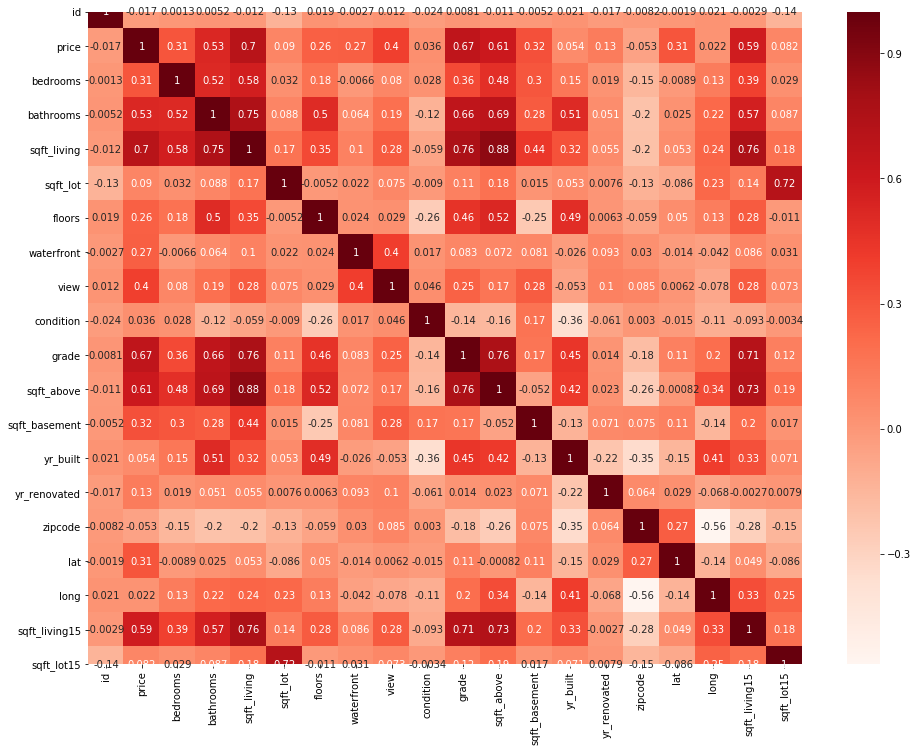

In [8]:
cor=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
id              -0.016797
zipcode         -0.053168
Name: price, dtype: float64

The variable that affects the price the most is 'sqft_living' with 0.70 correlation value

# # Data Preprocessing

In [10]:
df=df.drop(["id"],axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The id column is no meaningful for this problem so,i dropped it.Also,the date column is non numeric,but i dont want to drop it so i will split in to 3 parts day,month,year.The last thingi will do this is i will not remove the zipcode column because after I finished the whole process ,i remove it and checked the performance of the models,Iget better results with the zipcode column

In [11]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

df=df.drop("date",axis=1)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,...,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


I split the date column into "year","month","day" columns.These columns are located on the far right.Then I dropped the date column

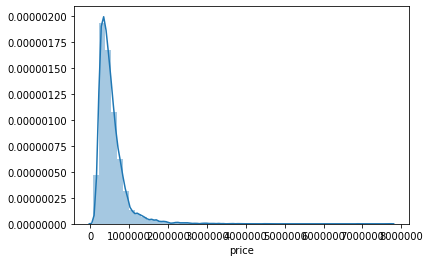

In [17]:
sns.distplot(df['price'])


It looks like a normal distribution,but on right there is some data that distorts the distribution.I will drop some of it

In [18]:
len(df)*0.01

216.13

I found the number of rows to drop.so,216 rows will be dropped.

In [19]:
df=df.sort_values(["price"],ascending=False).iloc[216:]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
3281,1970000.0,5,3.75,3940,13738,1.5,0,3,4,9,...,1951,0,98004,47.6203,-122.212,2370,13320,2015,2,26
12283,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1988,0,98040,47.5632,-122.215,3700,14486,2014,10,15
9175,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1960,0,98040,47.5287,-122.220,3730,16560,2015,2,13
1152,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1963,0,98034,47.7165,-122.259,2630,13868,2015,4,21
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,1998,0,98005,47.6422,-122.157,3900,35237,2015,4,22


In this way some of the data that adversely affects the normal distribution is dropped

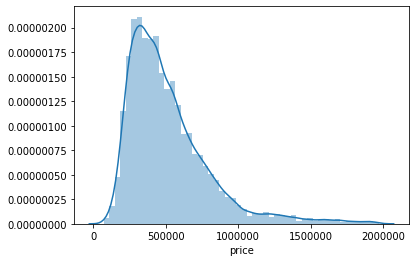

In [20]:
sns.distplot(df['price'])

We got more normal distribution

In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.139700e+04,21397.000000,21397.000000,21397.000000,2.139700e+04,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,...,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000
mean,5.182683e+05,3.360985,2.097537,2050.579707,1.499318e+04,1.490513,0.005328,0.216385,3.408282,7.626303,...,1970.988316,82.267748,98078.079871,47.559461,-122.213655,1971.626677,12696.738842,2014.322896,6.575221,15.693321
std,2.849974e+05,0.923908,0.746989,861.483593,4.097853e+04,0.539242,0.072799,0.729494,0.649548,1.135392,...,29.307017,396.784910,53.471510,0.139047,0.141223,668.086144,27203.128770,0.467594,3.116020,8.630871
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.469100,-122.329000,1480.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000,2014.000000,6.000000,16.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.055000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10022.000000,2015.000000,9.000000,23.000000
max,1.970000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,2015.000000,12.000000,31.000000


Changes in mean price and number of rows appearing after some data is removed

Data preparation is done lets move in to modelling

# creating models

In [22]:
# creating x and y
x=df.iloc[:,1:]
y=df.iloc[:,0:1]
X=x.values
Y=y.values

In [23]:
from sklearn.metrics import r2_score

Since  I will look at the r2_score after creating each model,I imported r2_score here,at the beginning







# linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)


print(f'R2 score:{r2_score(Y,lin_reg.predict(X))*100}')

R2 score:71.64763839437951


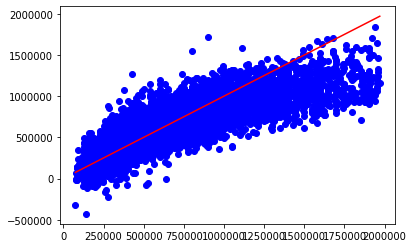

In [26]:
# linear Regression Graph
predictArray_lin=lin_reg.predict(X)
plt.scatter(Y,predictArray_lin,color="b")
plt.plot(Y,Y,color="r")

# ploynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)


print(f'R2 score:{r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X)))*100}')

R2 score:84.35305524646367


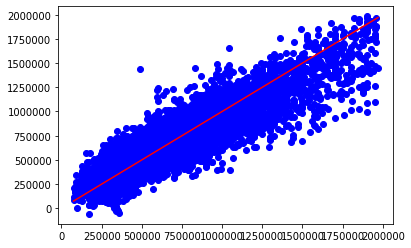

In [28]:
# POLYNOMIAL REGRESSION GRAPH

predictArray_poly=lin_reg2.predict(poly_reg.fit_transform(X))
plt.scatter(Y,predictArray_poly,color="b")
plt.plot(Y,Y,color="r")

# SVR (Support Vector Regression)

Unlike the other models SVR,receives the data as scaled

In [30]:
# scaling the data

from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_scaled=sc1.fit_transform(X)

sc2=StandardScaler()
y_scaled=np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

In [33]:
from sklearn.svm import SVR

svr_reg=SVR(kernel='rbf')
svr_reg.fit(x_scaled,y_scaled)
print(f'R2 score:{r2_score(y_scaled,svr_reg.predict(x_scaled))*100}')

R2 score:86.99024352177773


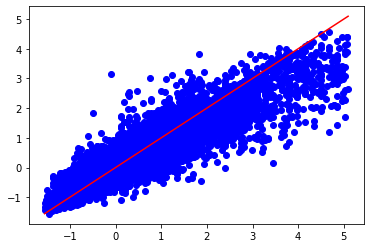

In [34]:
# SVR regression graph
predictArray_svr=svr_reg.predict(x_scaled)
plt.scatter(y_scaled,predictArray_svr,color="b")
plt.plot(y_scaled,y_scaled,color="r")

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
r_dt=DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

print(f'R2 score:{r2_score(Y,r_dt.predict(X))*100}')

R2 score:99.99999987944335


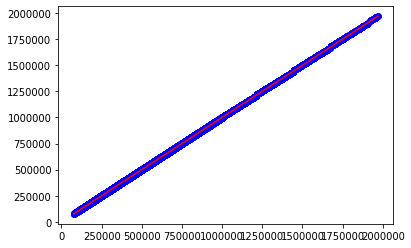

In [37]:
#Decision tree Grapg

predictArray_dt=r_dt.predict(X)
plt.scatter(Y,predictArray_dt,color="b")
plt.plot(Y,Y,color="r")

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R2 score:{r2_score(Y,rf_reg.predict(X))*100}')

R2 score:97.58221956997464


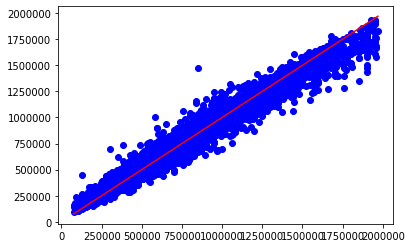

In [42]:
#Random Forest Regression graph

predictArray_rf=rf_reg.predict(X)
plt.scatter(Y,predictArray_rf,color="b")
plt.plot(Y,Y,color="r")

# Conclusion


In [43]:
# creation of r2_scores

r2_lin=r2_score(Y,lin_reg.predict(X))*100
r2_poly=r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X)))*100
r2_SVR=r2_score(y_scaled,svr_reg.predict(x_scaled))*100
r2_dt=r2_score(Y,r_dt.predict(X))*100
r2_rf=r2_score(Y,rf_reg.predict(X))*100

Text(0.5, 1.0, 'Random Fprest Regression.')

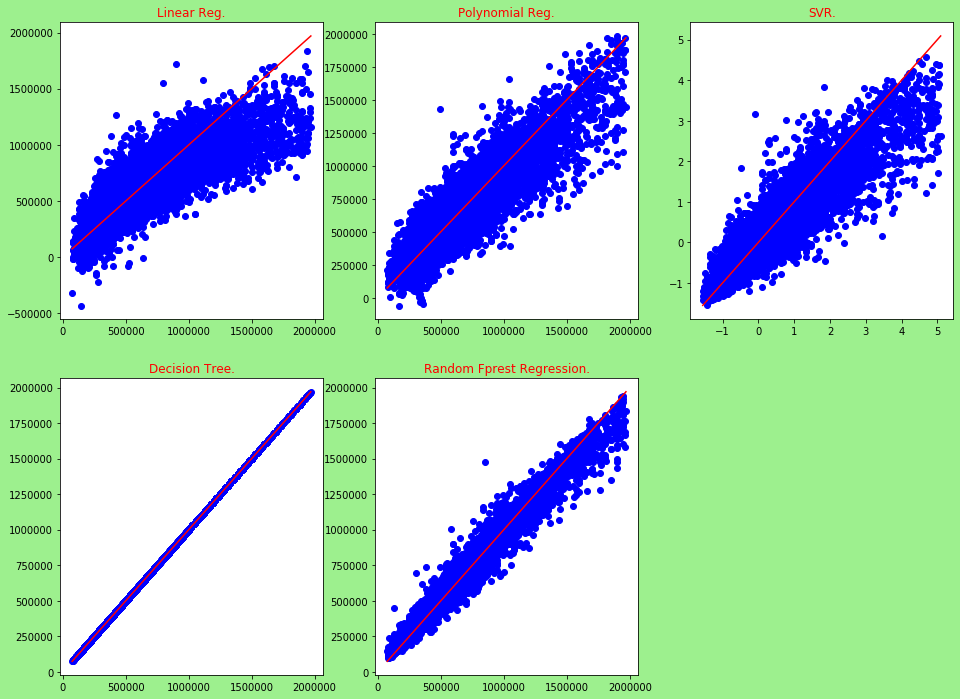

In [44]:
# Regression graphs and subplots
plt.figure(figsize=(16,12),facecolor='#9DF08E')
plt.subplot(2,3,1)
plt.scatter(Y,predictArray_lin,color="b")
plt.plot(Y,Y,color="r")
plt.title('Linear Reg.',color='r')

plt.subplot(2,3,2)
plt.scatter(Y,predictArray_poly,color="b")
plt.plot(Y,Y,color="r")
plt.title('Polynomial Reg.',color='r')

plt.subplot(2,3,3)
plt.scatter(y_scaled,predictArray_svr,color="b")
plt.plot(y_scaled,y_scaled,color="r")
plt.title('SVR.',color='r')

plt.subplot(2,3,4)
plt.scatter(Y,predictArray_dt,color="b")
plt.plot(Y,Y,color="r")
plt.title('Decision Tree.',color='r')

plt.subplot(2,3,5)
plt.scatter(Y,predictArray_rf,color="b")
plt.plot(Y,Y,color="r")
plt.title('Random Fprest Regression.',color='r')

In [47]:
# printing R2 score values
print("----------R2 scores of models-----------")
print(f'Linear Resgression R2 score       :{r2_lin}')
print(f'Polynomial Regression R2 score    :{r2_poly}')
print(f'SVR R2 score                      :{r2_SVR}')
print(f'Decision Tree R2 score            :{r2_dt}')
print(f'Random Forest Regression R2 score :{r2_rf}')


----------R2 scores of models-----------
Linear Resgression R2 score       :71.64763839437951
Polynomial Regression R2 score    :84.35305524646367
SVR R2 score                      :86.99024352177773
Decision Tree R2 score            :99.99999987944335
Random Forest Regression R2 score :97.58221956997464


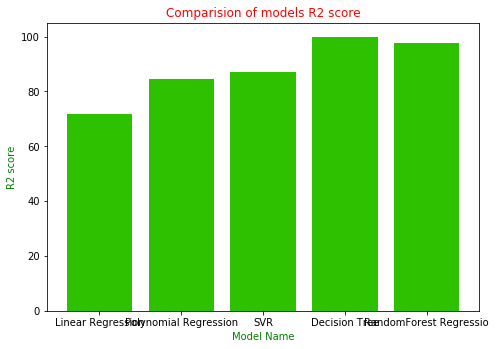

In [50]:
#Bar graph Display of R2 scores
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title("Comparision of models R2 score",color="r")
ax.set_xlabel("Model Name",color="g")
ax.set_ylabel("R2 score",color="g")
models_name=["Linear Regression","Polynomial Regression","SVR","Decision Tree","RandomForest Regressio"]
models_r2s=[r2_lin,r2_poly,r2_SVR,r2_dt,r2_rf]
ax.bar(models_name,models_r2s,color="#2DC100")
plt.show()

# comments on the results

Although Decision Tree has the highest R2 score(99.99),I think the most sussessful model for regression of this dataset is "Random Forest".Because 99.99 is such a perfect score it should not be,there may be some mistakes somewhere
Also,the variable that affects the price the most is "sqft_living" with +0.70 correlation value.